Notebook for testing the systems and visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from systems import InvertedPendulum, CartPole

#### Inverted Pendulum tests

In [2]:
# Create pendulum system
pendulum = InvertedPendulum(dt=0.05)

print(f"\nSafe Region:")
safe_region = pendulum.safe_region
for key, (min_val, max_val) in safe_region.items():
    print(f"  - {key}: [{min_val}, {max_val}]")


Safe Region:
  - theta: [-0.5, 0.5]
  - theta_dot: [-1.0, 1.0]


In [5]:
print("TEST 1: Zero Dynamics (Equilibrium)")
print("If θ=0 and θ̇=0 with u=0, next state should be ~[0, 0]")

state = np.array([0.0, 0.0])
action = 0.0
next_state = pendulum.step(state, action)

print("\nTest Outputs:")
print(f"Initial state: {state}")
print(f"Action: {action}")
print(f"Next state: {next_state}")

TEST 1: Zero Dynamics (Equilibrium)
If θ=0 and θ̇=0 with u=0, next state should be ~[0, 0]

Test Outputs:
Initial state: [0. 0.]
Action: 0.0
Next state: [0. 0.]


In [6]:
print("TEST 2: Gravity Effect (No Control)")
print("If θ ≠ 0 with u=0, pendulum should fall (θ increases)")

state = np.array([0.1, 0.0])  # 0.1 rad tilt, no rotation
action = 0.0  # No control

# Simulate 10 steps
trajectory = [state.copy()]
for i in range(10):
    state = pendulum.step(state, action)
    trajectory.append(state.copy())

trajectory = np.array(trajectory)

print("\nTest Outputs:")
print(f"Initial state: θ={state[0]:.3f} rad, θ̇={state[1]:.3f} rad/s")
print(f"Action: {action} (no control)")
print(f"Trajectory (angle):")
for i, s in enumerate(trajectory[::2]):
    print(f"  Step {i*2:2d}: θ = {s[0]:7.4f} rad, θ̇ = {s[1]:7.4f} rad/s")

TEST 2: Gravity Effect (No Control)
If θ ≠ 0 with u=0, pendulum should fall (θ increases)

Test Outputs:
Initial state: θ=0.221 rad, θ̇=0.626 rad/s
Action: 0.0 (no control)
Trajectory (angle):
  Step  0: θ =  0.1000 rad, θ̇ =  0.0000 rad/s
  Step  2: θ =  0.1024 rad, θ̇ =  0.0977 rad/s
  Step  4: θ =  0.1147 rad, θ̇ =  0.1992 rad/s
  Step  6: θ =  0.1374 rad, θ̇ =  0.3140 rad/s
  Step  8: θ =  0.1721 rad, θ̇ =  0.4525 rad/s
  Step 10: θ =  0.2214 rad, θ̇ =  0.6265 rad/s


In [5]:
print("TEST 3: Control Effectiveness")
print("If θ>0 with negative torque, pendulum should recover (θ decreases)")

state = np.array([0.2, 0.0])  # 0.2 rad tilt
action = -1 # Apply corrective torque (negative)

# Simulate 10 steps with corrective control
trajectory = [state.copy()]
for i in range(50):
    state = pendulum.step(state, action)
    trajectory.append(state.copy())

trajectory = np.array(trajectory)

# print(f"\nTrajectory (angle):")
# for i, s in enumerate(trajectory[::2]):
    # print(f"  Step {i*2:2d}: θ = {s[0]:7.4f} rad")

angle_decrease = trajectory[0, 0] - trajectory[-1, 0]
print(f"\nAngle decrease: {angle_decrease:.4f} rad (should be positive)")

if angle_decrease > 0.05:
    print("✓ PASS: Control effectively stabilizes pendulum")
else:
    print("✗ FAIL: Control effectiveness test failed")

TEST 3: Control Effectiveness
If θ>0 with negative torque, pendulum should recover (θ decreases)

Angle decrease: -4.9421 rad (should be positive)
✗ FAIL: Control effectiveness test failed


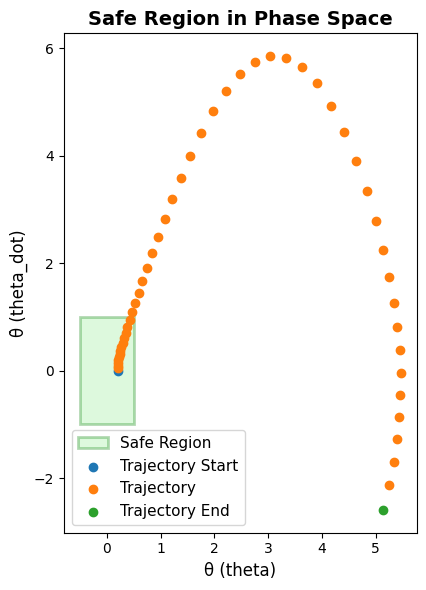

In [6]:
fig, ax = pendulum.plot_states(trajectory)

In [13]:
print("TEST 4: Safety Region Checking")

test_states = [
    (np.array([0.0, 0.0]), True, "Center (should be safe)"),
    (np.array([0.3, 0.5]), True, "Inside bounds (should be safe)"),
    (np.array([0.6, 0.0]), False, "θ too large (should be unsafe)"),
    (np.array([0.0, 1.5]), False, "θ̇ too large (should be unsafe)"),
    (np.array([-0.5, 0.0]), True, "At boundary (should be safe)"),
]

print("\nTesting is_safe() function:")
all_pass = True
for state, expected, description in test_states:
    result = pendulum.is_safe(state)
    status = "✓" if result == expected else "✗"
    print(f"{status} {description}: is_safe={result} (expected {expected})")
    if result != expected:
        all_pass = False

if all_pass:
    print("\n✓ PASS: All safety checks correct")
else:
    print("\n✗ FAIL: Some safety checks failed")

TEST 4: Safety Region Checking

Testing is_safe() function:
✓ Center (should be safe): is_safe=True (expected True)
✓ Inside bounds (should be safe): is_safe=True (expected True)
✓ θ too large (should be unsafe): is_safe=False (expected False)
✓ θ̇ too large (should be unsafe): is_safe=False (expected False)
✓ At boundary (should be safe): is_safe=True (expected True)

✓ PASS: All safety checks correct


### Cartpole tests

In [15]:
# Create CartPole system
cartpole = CartPole(dt=0.02)

print(f"\nSafe Region:")
safe_region = cartpole.safe_region
for key, (min_val, max_val) in safe_region.items():
    print(f"  - {key}: [{min_val}, {max_val}]")


Safe Region:
  - x: [-2.4, 2.4]
  - x_dot: [-5.0, 5.0]
  - theta: [-0.209, 0.209]
  - theta_dot: [-5.0, 5.0]


In [17]:
print("TEST 1: CartPole Zero Dynamics")
print("If all states=0 with u=0, next state should be ~[0,0,0,0]")

state = np.array([0.0, 0.0, 0.0, 0.0])
action = np.array([0.0])
next_state = cartpole.step(state, action)

print("\nTest outputs:")
print(f"Initial state: {state}")
print(f"Action: {action}")
print(f"Next state: {next_state}")

if np.allclose(next_state, state, atol=1e-5):
    print("✓ PASS: CartPole at equilibrium")
else:
    print("✗ FAIL: Equilibrium test failed")

TEST 1: CartPole Zero Dynamics
If all states=0 with u=0, next state should be ~[0,0,0,0]

Test outputs:
Initial state: [0. 0. 0. 0.]
Action: [0.]
Next state: [0. 0. 0. 0.]
✓ PASS: CartPole at equilibrium


In [19]:
print("TEST 2: CartPole Falls Without Control")

state = np.array([0.0, 0.0, 0.1, 0.0])  # Pole tilted, no control
action = np.array([0.0])

print("\nTest outputs:")
print(f"Initial state: x={state[0]:.3f}, θ={state[2]:.3f} rad")
print(f"Action: {action[0]} (no force)")

trajectory = [state.copy()]
for i in range(20):
    state = cartpole.step(state, action)
    trajectory.append(state.copy())

trajectory = np.array(trajectory)

print(f"\nPole angle over time:")
for i, s in enumerate(trajectory[::5]):
    print(f"  Step {i*5:2d}: θ = {s[2]:7.4f} rad")

angle_growth = np.abs(trajectory[-1, 2]) - np.abs(trajectory[0, 2])
if angle_growth > 0.05:
    print("✓ PASS: CartPole is unstable without control")
else:
    print("✗ FAIL: CartPole instability test failed")

TEST 2: CartPole Falls Without Control

Test outputs:
Initial state: x=0.000, θ=0.100 rad
Action: 0.0 (no force)

Pole angle over time:
  Step  0: θ =  0.1000 rad
  Step  5: θ =  0.1096 rad
  Step 10: θ =  0.1367 rad
  Step 15: θ =  0.1854 rad
  Step 20: θ =  0.2636 rad
✓ PASS: CartPole is unstable without control


In [20]:
print("TEST 3: CartPole Safety Region")

test_states = [
    (np.array([0.0, 0.0, 0.0, 0.0]), True, "Center (should be safe)"),
    (np.array([1.0, 0.0, 0.1, 0.0]), True, "Inside bounds (should be safe)"),
    (np.array([3.0, 0.0, 0.0, 0.0]), False, "x too large (should be unsafe)"),
    (np.array([0.0, 0.0, 0.3, 0.0]), False, "θ too large (should be unsafe)"),
]

print("\nTesting CartPole is_safe() function:")
all_pass = True
for state, expected, description in test_states:
    result = cartpole.is_safe(state)
    status = "✓" if result == expected else "✗"
    print(f"{status} {description}: is_safe={result} (expected {expected})")
    if result != expected:
        all_pass = False

if all_pass:
    print("\n✓ PASS: All CartPole safety checks correct")
else:
    print("\n✗ FAIL: Some CartPole safety checks failed")

TEST 3: CartPole Safety Region

Testing CartPole is_safe() function:
✓ Center (should be safe): is_safe=True (expected True)
✓ Inside bounds (should be safe): is_safe=True (expected True)
✓ x too large (should be unsafe): is_safe=False (expected False)
✓ θ too large (should be unsafe): is_safe=False (expected False)

✓ PASS: All CartPole safety checks correct
